<a href="https://colab.research.google.com/github/khldsqmr/Customer-Analytics-on-Retail-data/blob/main/MSCI_623_Customer%20Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Abstract**
In this project, we have used the retail transactional dataset from the UCI Machine Learning Repository. Based on the UCI website, the data contains the transactions of a UK-based and registered non-store online retail carried out between 01-12-2010 and 09-12-2011. The company is the main seller of unique all-occasion gifts and the customers of the company are mainly wholesalers. Our aim in this project is to perform exploratory, descriptive, predictive, and prescriptive analysis to help organizations to improve their sale and revenue using transactional data. We have extended our research of the analysis conducted on this dataset, and performed exploratory data analysis, determined product performance based on the transactions using association rules, devised a Loyalty program based on customer segmentation using clustering algorithms, and strategy recommendations for customer retention using five comparative classification models. We have carried out our analysis and implemented the algorithms using Python programming. The preliminary results of our analysis are adequate for retail businesses to dive deep into the nuances of transactional models in retail and e-commerce industry.


## **Import Libraries**

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import warnings
import datetime
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **READ FILE**

In [ ]:
# Importing csv file into the system.
dataframe = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')

In [ ]:
df = pd.DataFrame(dataframe)

In [ ]:
# Understanding the data.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.shape

(541909, 8)

In [ ]:
#Checking number of NULL VALUES in the dataframe
np.sum(df.isnull())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
print("Customers missing: ", round(df['CustomerID'].isnull().sum() * 100 / len(df),3),"%" )

Customers missing:  24.927 %


In [ ]:
# Removing instances where Customer ID = NULL
df.dropna(subset=['CustomerID'],how='all',inplace=True)

In [ ]:
# Removing negative values of Quantity in the dataframe if present.
df = df.drop(df[(df["Quantity"] < 0)].index)

In [ ]:
# Dropping zero values of Unit Price
df = df.drop(df[(df["UnitPrice"] == 0)].index)

In [ ]:
# Considering data for the year 2011 because for the year 2010, only December data is available.
df = df.query("InvoiceDate.dt.year != 2010")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom


In [ ]:
df.shape

(371727, 8)

In [ ]:
# Removing all other values from Stock Code except Product Codes.
df = df.drop(df[df['StockCode'].astype('str') == 'M'].index)
df = df.drop(df[df['StockCode'].astype('str') == 'PAD'].index)
df = df.drop(df[df['StockCode'].astype('str') == 'C2'].index)
df = df.drop(df[df['StockCode'].astype('str') == 'BANK CHARGES'].index)
df = df.drop(df[df['StockCode'].astype('str') == 'POST'].index)
df = df.drop(df[df['StockCode'].astype('str') == 'DOT'].index)

In [ ]:
df.shape

(370284, 8)

In [ ]:
# Number of Unique Transactions 
print("Number of transactions: ", df['InvoiceNo'].nunique())
print("Number of products bought: ", df['StockCode'].nunique())
print("Number of customers:", df['CustomerID'].nunique())
print('Number of countries: ', df['Country'].nunique())

Number of transactions:  17008
Number of products bought:  3591
Number of customers: 4214
Number of countries:  36


In [ ]:
ux=["Transactions", "Products Sold", "Customers"]
uy = [df['InvoiceNo'].nunique(), df['StockCode'].nunique(), df['CustomerID'].nunique()]
unique = pd.DataFrame(np.column_stack([ux, uy]), columns=['Variables', 'Unique Count'])
unique.head()

,Variables,Unique Count
0,Transactions,17008
1,Products Sold,3591
2,Customers,4214


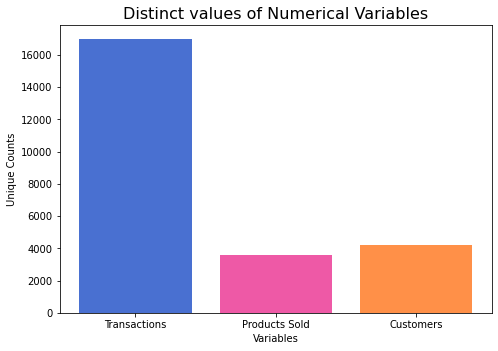

In [ ]:
fig = plt.figure()
a = fig.add_axes([0,0,1,1])
a.set_ylabel('Unique Counts')
a.set_xlabel('Variables')
a.bar(ux,uy, color=['#4970D1', '#EE59A6', '#FF9048'])
plt.title('Distinct values of Numerical Variables', fontsize = 16)

plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370284 entries, 42481 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    370284 non-null  object        
 1   StockCode    370284 non-null  object        
 2   Description  370284 non-null  object        
 3   Quantity     370284 non-null  int64         
 4   InvoiceDate  370284 non-null  datetime64[ns]
 5   UnitPrice    370284 non-null  float64       
 6   CustomerID   370284 non-null  float64       
 7   Country      370284 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 25.4+ MB


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom


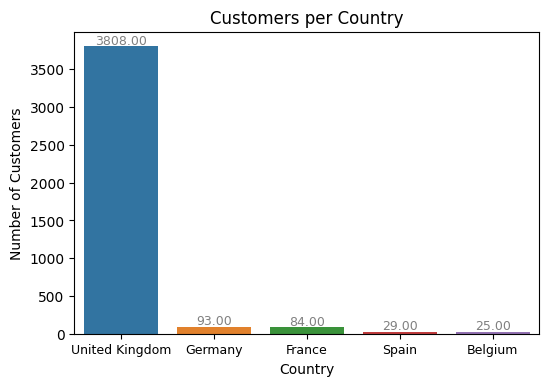

In [ ]:
#EXPLORING Top 5 COUNTRIES on the basis of Customers per Country:-
top_5_countries = pd.DataFrame(df.groupby('Country')['CustomerID'].nunique())
top_5_countries.columns = ['Customers_by_Country']
top_5_countries.sort_values('Customers_by_Country', inplace=True, ascending=False)
top_5_countries = top_5_countries[:5][:]

figure, axis = plt.subplots(figsize=(6,4),dpi=100)
axis=sns.barplot(x=top_5_countries.index, y=top_5_countries['Customers_by_Country'])
axis.set_xticklabels(axis.get_xticklabels(), rotation=0, fontsize=9, ha="center")

for i in axis.patches: axis.annotate("%.2f" % i.get_height(), (i.get_x() + i.get_width() / 2., i.get_height()),
                 ha='center', va='center', fontsize=9, color='gray', xytext=(0, 4), textcoords='offset points')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.title('Customers per Country')
plt.show()

In [ ]:
# Considering data for United Kingdom because it has maximum customers.
df_uk = df[df['Country'] =="United Kingdom"] 

In [ ]:
df_uk.shape

(330076, 8)

**TOP 5 Product ID (StockCode)**

In [ ]:
# Considering Top 5 StockCode on the basis of Count of Description
pro = df_uk[['StockCode','Description']].groupby(['StockCode'])['Description'].size().nlargest(5).reset_index(name='Count')

In [ ]:
pro.head() 

,StockCode,Count
0,85123A,1745
1,85099B,1387
2,22423,1302
3,47566,1288
4,84879,1243


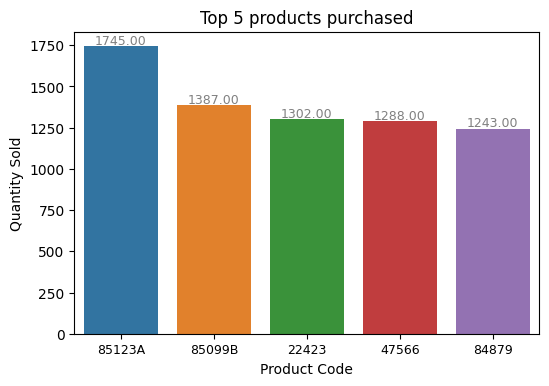

In [ ]:
fig, axis = plt.subplots(figsize=(6,4),dpi=100)
axis=sns.barplot(x=pro['StockCode'], y=pro['Count'])
axis.set_xticklabels(axis.get_xticklabels(), rotation=0, fontsize=9, ha="center")
plt.title("Top 5 products purchased")
plt.xlabel("Product Code")
plt.ylabel("Quantity Sold")

for i in axis.patches:
             axis.annotate("%.2f" % i.get_height(), (i.get_x() + i.get_width() / 2., i.get_height()),
                 ha='center', va='center', fontsize=9, color='gray', xytext=(0, 4),
                 textcoords='offset points')

plt.show()

In [ ]:
df_uk['Date'], df_uk['Time'] = df_uk['InvoiceDate'].dt.normalize(), df_uk['InvoiceDate'].dt.time
# Adding 1 because we want to start days from Monday rather than Sunday.
df_uk.insert(loc=10, column='Day', value=(df_uk.InvoiceDate.dt.dayofweek)+1)
# Generating new feature Revenue by multiplying Quantity and Unit Price.
df_uk['Total_revenue'] = df_uk['Quantity'] * df_uk['UnitPrice']

In [ ]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Day,Total_revenue
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,2011-01-04,10:00:00,2,19.5
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011-01-04,10:00:00,2,10.5
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,2011-01-04,10:00:00,2,10.5
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,2011-01-04,10:00:00,2,10.5
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,2011-01-04,10:00:00,2,12.5


In [ ]:
# Aggregating Total Revenue generated each day. 
df_revenue = df_uk.groupby(['Date'],as_index=False).agg({'Total_revenue': 'sum'})

In [ ]:
df_revenue.head()

,Date,Total_revenue
0,2011-01-04,11566.75
1,2011-01-05,27393.50
2,2011-01-06,26405.14
3,2011-01-07,17617.90
4,2011-01-09,14306.04


In [ ]:
# Converting into date format just to ensure that each instance is in date format.
df_revenue['Date'] = pd.to_datetime(df_revenue['Date'])
df_revenue['Date'] = pd.to_datetime(df_revenue['Date'], format="%Y-%m-%d")
df_revenue.set_index('Date', inplace=True)

In [ ]:
df_revenue.head()

,Total_revenue
Date,
2011-01-04,11566.75
2011-01-05,27393.50
2011-01-06,26405.14
2011-01-07,17617.90
2011-01-09,14306.04


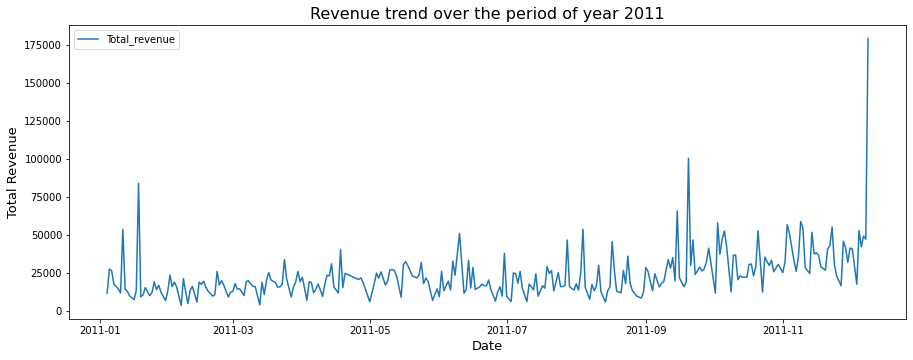

In [ ]:
# Time Series Plot.
df_revenue.plot(figsize = (15,6))
plt.xlabel('Date',fontsize = 13)
plt.ylabel('Total Revenue', fontsize = 13)
plt.xticks(rotation=0, ha='center')
plt.title('Revenue trend over the period of year 2011', fontsize = 16)
plt.show()

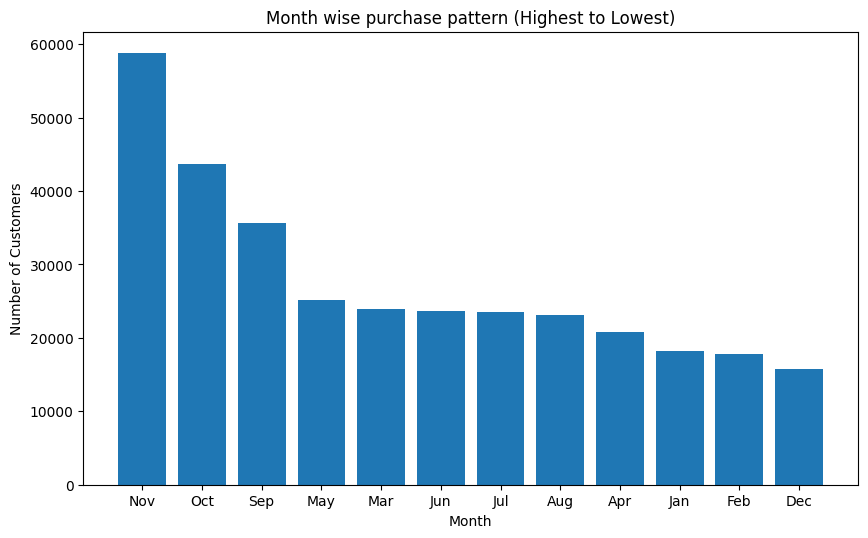

In [ ]:
# Month wise purchase pattern of Customers.
dtc = (df_uk['Date'].dt.strftime("%b")).value_counts(sort=True)
plt.subplots(figsize=(10,6),dpi=100)
plt.bar(dtc.index, dtc)
plt.title("Month wise purchase pattern (Highest to Lowest)")
plt.ylabel("Number of Customers")
plt.xlabel("Month")
plt.show()

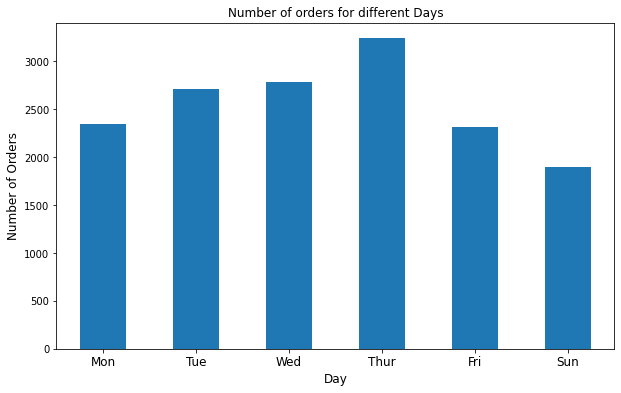

In [ ]:
# Daywise purchase pattern of Customers.
axis = df_uk.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar', figsize=(10,6))
axis.set_xlabel('Day',fontsize=12)
axis.set_ylabel('Number of Orders',fontsize=12)
axis.set_title('Number of orders for different Days',fontsize=12)
axis.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=12)
plt.show()

In [ ]:
# Converting Time Feature into 24 intervals of 1 hour each.
s = df_uk['InvoiceDate'].dt.floor('1H')
df_uk['Time'] = s.dt.strftime('%H:%M') 


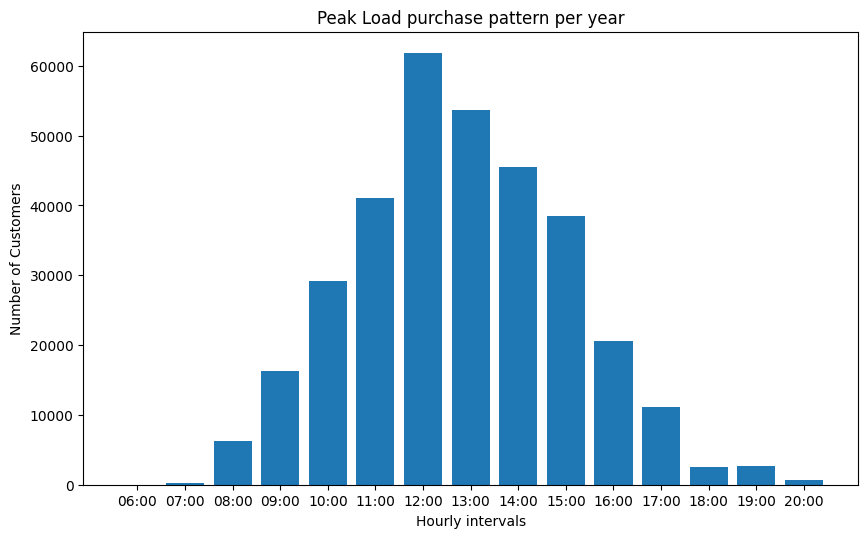

In [ ]:
# Hourly Purchase pattern of Customers.
dtc = (df_uk['Time']).value_counts(sort=False).sort_index(ascending=True)
plt.subplots(figsize=(10,6),dpi=100)
plt.bar(dtc.index, dtc)
plt.title("Peak Load purchase pattern per year")
plt.ylabel("Number of Customers")
plt.xlabel("Hourly intervals")
plt.show()

# **Association Rules**

In [ ]:
# Importing libraries for Association Rules.
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
# Dividing each Invoice on the basis of Description.
case_UK = (df_uk.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')) 

In [ ]:
case_UK

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PC CUTLERY SET PANTRY DESIGN,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 BIRDS CANVAS SCREEN,...,YELLOW DRAGONFLY HELICOPTER,YELLOW EASTER EGG HUNT START POST,YELLOW FELT HANGING HEART W FLOWER,YELLOW FLOWERS FELT HANDBAG KIT,YELLOW GIANT GARDEN THERMOMETER,YELLOW METAL CHICKEN HEART,YELLOW PINK FLOWER DESIGN BIG BOWL,YELLOW POT PLANT CANDLE,YELLOW SHARK HELICOPTER,YELLOW/BLUE RETRO RADIO,YELLOW/ORANGE FLOWER DESIGN PLATE,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HEART FLOWER T-LIGHT HOLDER,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC PLANT POT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
539993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
# One Hot Encoding.
def OHE(x): 
    while(x<=0): return 0
    while(x>=1): return 1

case_encoded = case_UK.applymap(OHE) 
case_UK = case_encoded 

In [ ]:
case_encoded

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PC CUTLERY SET PANTRY DESIGN,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 BIRDS CANVAS SCREEN,...,YELLOW DRAGONFLY HELICOPTER,YELLOW EASTER EGG HUNT START POST,YELLOW FELT HANGING HEART W FLOWER,YELLOW FLOWERS FELT HANDBAG KIT,YELLOW GIANT GARDEN THERMOMETER,YELLOW METAL CHICKEN HEART,YELLOW PINK FLOWER DESIGN BIG BOWL,YELLOW POT PLANT CANDLE,YELLOW SHARK HELICOPTER,YELLOW/BLUE RETRO RADIO,YELLOW/ORANGE FLOWER DESIGN PLATE,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HEART FLOWER T-LIGHT HOLDER,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC PLANT POT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
539993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
540001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
540002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
540003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
540004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
# Building the asociation model with Minimum Support.
support_items = apriori(case_UK, min_support = 0.01, use_colnames = True) 

In [ ]:
# Itemsets in the descending order based on their support.
support_items.sort_values(by=['support'], ascending=False)

,support,itemsets
602,0.110385,(WHITE HANGING HEART T-LIGHT HOLDER)
255,0.089655,(JUMBO BAG RED RETROSPOT)
426,0.084292,(REGENCY CAKESTAND 3 TIER)
353,0.083115,(PARTY BUNTING)
37,0.079323,(ASSORTED COLOUR BIRD ORNAMENT)
...,...,...
957,0.010005,"(SET OF 3 WOODEN TREE DECORATIONS, SET OF 3 WO..."
77,0.010005,(CARD CIRCUS PARADE)
73,0.010005,(BUNDLE OF 3 SCHOOL EXERCISE BOOKS )
640,0.010005,"(PACK OF 60 PINK PAISLEY CAKE CASES, 72 SWEETH..."


In [ ]:
# Applying Association Rule and sorting in descending order on the basis of "Confidence" and "Lift".
associationRule = association_rules(support_items, metric ="lift", min_threshold = 1) 
associationRule = associationRule.sort_values(['confidence', 'lift'], ascending =[False, False]) 

In [ ]:
associationRule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
164,(HERB MARKER THYME),(HERB MARKER ROSEMARY),0.010986,0.011248,0.010463,0.952381,84.673311,0.010339,20.763798
160,(HERB MARKER PARSLEY),(HERB MARKER ROSEMARY),0.010921,0.011248,0.010267,0.940120,83.583206,0.010144,16.512163
1162,"(REGENCY TEA PLATE ROSES , REGENCY TEA PLATE P...",(REGENCY TEA PLATE GREEN ),0.010725,0.014844,0.010005,0.932927,62.847212,0.009846,14.687775
165,(HERB MARKER ROSEMARY),(HERB MARKER THYME),0.011248,0.010986,0.010463,0.930233,84.673311,0.010339,14.175865
1164,"(REGENCY TEA PLATE PINK, REGENCY TEA PLATE GRE...",(REGENCY TEA PLATE ROSES ),0.010790,0.017395,0.010005,0.927273,53.307724,0.009818,13.510823
...,...,...,...,...,...,...,...,...,...
655,(WHITE HANGING HEART T-LIGHT HOLDER),(SPOTTY BUNTING),0.110385,0.059377,0.010528,0.095379,1.606319,0.003974,1.039798
649,(WHITE HANGING HEART T-LIGHT HOLDER),(SET/5 RED RETROSPOT LID GLASS BOWLS),0.110385,0.042964,0.010463,0.094787,2.206208,0.005720,1.057250
394,(WHITE HANGING HEART T-LIGHT HOLDER),(LOVE BUILDING BLOCK WORD),0.110385,0.032631,0.010398,0.094194,2.886612,0.006796,1.067965
668,(WHITE HANGING HEART T-LIGHT HOLDER),(ZINC METAL HEART DECORATION),0.110385,0.027662,0.010332,0.093602,3.383830,0.007279,1.072750


# **Clustering Analysis**

In [ ]:
# Importing libraries for KMeans and PCA.
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# Performing RFM analysis for Customer Segmentation. 
dfRecency = df_uk.groupby('CustomerID', as_index=False)['Date'].max()
dfRecency.columns = ['CustomerID', 'RecentBuyDate']
dfRecency.head()

,CustomerID,RecentBuyDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [ ]:
# Calculating Recency by Feature Engineering using Recent Buy Date. 
dfRecency['RecentBuyDate'] = pd.to_datetime(dfRecency['RecentBuyDate']).dt.date
dfRecency['Recency'] = dfRecency['RecentBuyDate'].apply(lambda current: (dt.date(2011,12,9) - current).days)
dfRecency.drop('RecentBuyDate', axis=1, inplace=True)
# Sorting Recency in Descending Order.
dfRecency.sort_values(by='Recency', ascending=False).head()

,CustomerID,Recency
2419,16282.0,339
1838,15464.0,338
1703,15266.0,338
260,13187.0,337
12,12829.0,336


In [ ]:
# Check and drop any dupicates for "Invoice No." and "Customer ID" if present.
dfFreqUk = pd.DataFrame(df_uk)
dfFreqUk.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], inplace=True)

# Calculating Frequency by Feature Engineering using Customer ID.
dfFrequency = dfFreqUk.groupby('CustomerID', as_index=False)['InvoiceNo'].count()
dfFrequency.columns = ['CustomerID','Frequency']
dfFrequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,9
2,12748.0,171
3,12749.0,5
4,12820.0,4


In [ ]:
# Calculating Monetary by Feature Engineering using Total Revenue. 
dfMonetary = df_uk.groupby('CustomerID', as_index=False).agg({'Total_revenue': 'sum'})
dfMonetary.columns = ['CustomerID', 'Monetary']
dfMonetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,3489.74
2,12748.0,28131.42
3,12749.0,4040.88
4,12820.0,942.34


In [ ]:
# Grouping "Recency", "Frequency", "Monetary" 
dfMerge1 = dfRecency.merge(dfFrequency, on='CustomerID')
dfMerge = dfMerge1.merge(dfMonetary,on='CustomerID')
dfMerge.set_index('CustomerID',inplace=True)
dfMerge.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,9,3489.74
12748.0,0,171,28131.42
12749.0,3,5,4040.88
12820.0,3,4,942.34


In [ ]:
# Making Quantiles
classOfValues = dfMerge.quantile(q=[0.25,0.5,0.75])
classOfValues

,Recency,Frequency,Monetary
0.25,17.0,1.0,292.3350
0.50,47.0,2.0,636.3250
0.75,128.0,4.0,1534.9675


In [ ]:
# Generating RQuartile, FQuartile and MQuartile and assigning values- (1,2,3,4) 
# Value is denoted by a, recency denoted by r, quartiles denoted by x
def RecencyQuartile(a,r,x):
    if a <= x[r][0.25]: return 4
    elif a <= x[r][0.50]: return 3
    elif a <= x[r][0.75]: return 2
    else: return 1
# Value is denoted by a, Frequency-Monetary denoted by m, quartiles denoted by x
def FrequencyMonetaryQuartile(a,m,x):
    if a <= x[m][0.25]: return 1
    elif a <= x[m][0.50]: return 2
    elif a <= x[m][0.75]: return 3
    else: return 4

In [ ]:
# Build RFM Segmentation Table.
dfSeg = pd.DataFrame(dfMerge)
dfSeg['RQuartile'] = dfSeg['Recency'].apply(RecencyQuartile, args=('Recency',classOfValues))
dfSeg['FQuartile'] = dfSeg['Frequency'].apply(FrequencyMonetaryQuartile, args=('Frequency',classOfValues))
dfSeg['MQuartile'] = dfSeg['Monetary'].apply(FrequencyMonetaryQuartile, args=('Monetary',classOfValues))

In [ ]:
dfSeg.head()

,Recency,Frequency,Monetary,RQuartile,FQuartile,MQuartile
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,4
12747.0,2,9,3489.74,4,4,4
12748.0,0,171,28131.42,4,4,4
12749.0,3,5,4040.88,4,4,4
12820.0,3,4,942.34,4,3,3


In [ ]:
# Grouping RQuartile, FQuartile and MQuartile to generate new feature Group which provides insights regarding customer behaviour.
dfSeg['Group'] = dfSeg.RQuartile.map(str) + dfSeg.FQuartile.map(str) + dfSeg.MQuartile.map(str)
dfSeg.head()

,Recency,Frequency,Monetary,RQuartile,FQuartile,MQuartile,Group
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,4,114
12747.0,2,9,3489.74,4,4,4,444
12748.0,0,171,28131.42,4,4,4,444
12749.0,3,5,4040.88,4,4,4,444
12820.0,3,4,942.34,4,3,3,433


In [ ]:
# Converting Group Variable into Score so that Intervals can be formed.
dfSeg['Score'] = dfSeg[['RQuartile', 'FQuartile', 'MQuartile']].sum(axis = 1)
dfSeg.head()

,Recency,Frequency,Monetary,RQuartile,FQuartile,MQuartile,Group,Score
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6
12747.0,2,9,3489.74,4,4,4,444,12
12748.0,0,171,28131.42,4,4,4,444,12
12749.0,3,5,4040.88,4,4,4,444,12
12820.0,3,4,942.34,4,3,3,433,10


In [ ]:
dfSeg.shape

(3808, 8)

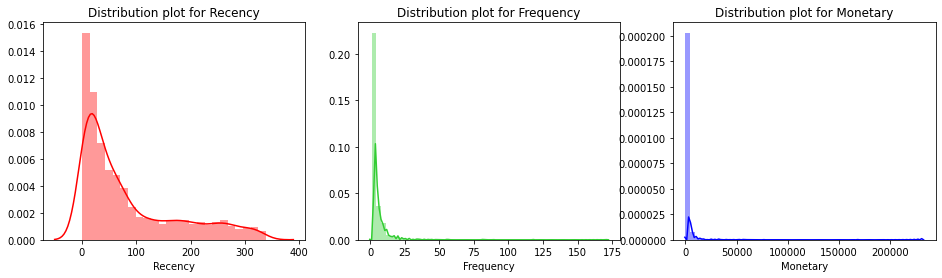

In [ ]:
# Distribution plot for Recency, Frequency and Monetary to visualize each generated feature.
plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
#Distribution plot for Recency
axis = sns.distplot(dfSeg['Recency'], color = 'red')
plt.title("Distribution plot for Recency")
plt.subplot(1, 3, 2)
#Distribution plot for Frequency
axis = sns.distplot(dfSeg['Frequency'], color='limegreen')
plt.title("Distribution plot for Frequency")
plt.subplot(1, 3, 3)
#Distribution plot for Monetary
axis = sns.distplot(dfSeg['Monetary'], color = 'blue')
plt.title("Distribution plot for Monetary")
plt.show()

In [ ]:
# Logarithmic transformation for Recency, Frequency and Monetary features.
# Adding delta(0.05) component for zero and negative values to handle infinite numbers generated during log transformation as Log(0)=undefined
rfm_r_log = np.log(dfSeg['Recency']+0.05)
rfm_f_log = np.log(dfSeg['Frequency']+0.001) 
rfm_m_log = np.log(dfSeg['Monetary']+0.05)
dfLog = pd.DataFrame({'Monetary': rfm_m_log, 'Recency': rfm_r_log, 'Frequency': rfm_f_log})

In [ ]:
# As recency can never be negative so ensuring that condition.
dfLog = dfLog.drop(dfLog[(dfLog["Recency"] < 0)].index)

In [ ]:
dfLog

,Monetary,Recency,Frequency
CustomerID,,,
12346.0,11.253943,5.783979,0.001000
12747.0,8.157597,0.717840,2.197336
12749.0,8.304230,1.115142,1.609638
12820.0,6.848419,1.115142,1.386544
12821.0,4.530123,5.366210,0.001000
...,...,...,...
18280.0,5.196561,5.624198,0.001000
18281.0,4.392843,5.193235,0.001000
18282.0,5.182345,1.953028,0.693647


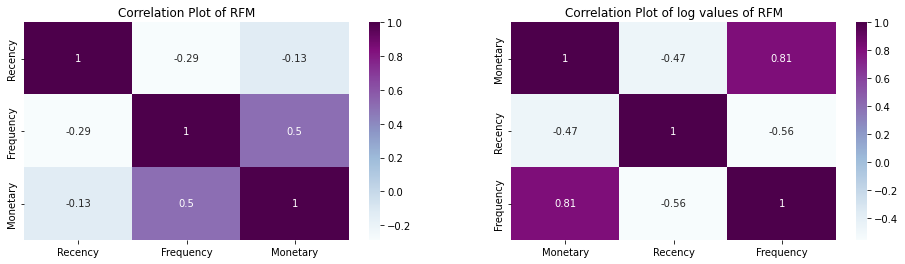

In [ ]:
# Correlation Plot for RFM values without and with log transformation.
plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
sns.heatmap(dfSeg[['Recency', 'Frequency', 'Monetary']].corr(), annot = True, cmap="BuPu")
plt.yticks(va="center")
plt.title("Correlation Plot of RFM")
plt.subplot(1, 2, 2)
sns.heatmap(dfLog.corr(), annot = True, cmap="BuPu")
plt.yticks(va="center")
plt.title("Correlation Plot of log values of RFM")
plt.show()

In [ ]:
# Segmenting customers on the basis of Loyalty Class by generating intervals from Score variable.
dfSeg['Interval'] = pd.cut(x=dfSeg['Score'], bins=[0, 3, 6, 10, 12])
dfSeg['LoyaltyClass'] = pd.cut(x=dfSeg['Score'], bins=[0, 3, 6, 10, 12], labels=['Bronze', 'Silver', 'Gold', 'Platinum'])
dfSeg.head()

,Recency,Frequency,Monetary,RQuartile,FQuartile,MQuartile,Group,Score,Interval,LoyaltyClass
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6,"(3, 6]",Silver
12747.0,2,9,3489.74,4,4,4,444,12,"(10, 12]",Platinum
12748.0,0,171,28131.42,4,4,4,444,12,"(10, 12]",Platinum
12749.0,3,5,4040.88,4,4,4,444,12,"(10, 12]",Platinum
12820.0,3,4,942.34,4,3,3,433,10,"(6, 10]",Gold


In [ ]:
dfSegB = pd.DataFrame(dfSeg)
dfSegB.reset_index(drop=True, inplace=True)
dfSegBox = dfMerge1.merge(dfMonetary,on='CustomerID')
dfSegBox.set_index('CustomerID',inplace=False)
dfSegBox.reset_index(drop=True, inplace=True)
dfSegBox.head()
dfSegBoxCon = pd.concat([dfSegBox, dfSeg.iloc[:,-1]], axis=1)

In [ ]:
dfSegBoxCon.head()

,CustomerID,Recency,Frequency,Monetary,LoyaltyClass
0,12346.0,325,1,77183.60,Silver
1,12747.0,2,9,3489.74,Platinum
2,12748.0,0,171,28131.42,Platinum
3,12749.0,3,5,4040.88,Platinum
4,12820.0,3,4,942.34,Gold


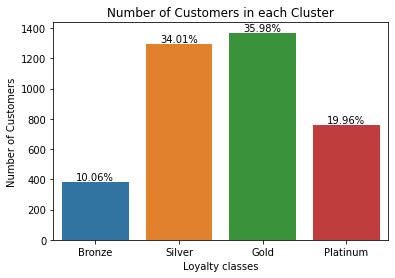

In [ ]:
# Number of customers in each Loyalty class.
axis = sns.countplot(x="LoyaltyClass", data=dfSegBoxCon)
for i in axis.patches:
    h = i.get_height()
    axis.text(i.get_x()+i.get_width()/2.,h+10,
              '{:1.2f}%'.format(h/len(dfSegBoxCon)*100),ha="center",fontsize=10) 
plt.xlabel('Loyalty classes')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in each Cluster')
plt.show()

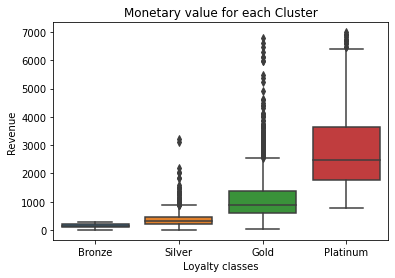

In [ ]:
# Revenue generated from each cluster , and taking revenue less than 7000 for visualization purpose. 
z = dfSegBoxCon[dfSegBoxCon["Monetary"]<7000]
sns.boxplot(x="LoyaltyClass", y="Monetary", data=z)
plt.xlabel('Loyalty classes')
plt.ylabel('Revenue')
plt.title('Monetary value for each Cluster')
plt.show()

In [ ]:
len(dfSegBoxCon)

3808

In [ ]:
# Using values of revenue less than 7000, instances decreases by 117 so just for visualization in boxplot it won't make much difference.
len(z)

3691

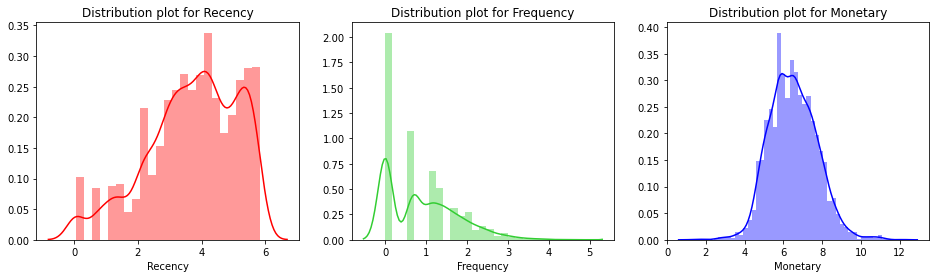

In [ ]:
# Distribution plot for log transformed values of Recency, Frequency and Monetary.
plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
#Distribution plot for Recency
axis = sns.distplot(dfLog['Recency'], color = 'red')
plt.title("Distribution plot for Recency")
plt.subplot(1, 3, 2)
#Distribution plot for Frequency
axis = sns.distplot(dfLog['Frequency'], color='limegreen')
plt.title("Distribution plot for Frequency")
plt.subplot(1, 3, 3)
#Distribution plot for Monetary
axis = sns.distplot(dfLog['Monetary'], color = 'blue')
plt.title("Distribution plot for Monetary")
plt.show()

**PCA and K-means** \
PCA will be carried out on Log transformed data because as observed in the above graph, Recency and Monetary are approximately normal, whereas frequency is right skewed, i.e., 20% of the customers are frequent.

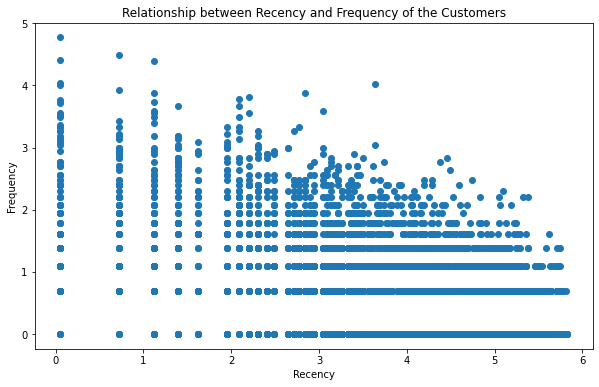

In [ ]:
# Scatter plot for Frequency and Recency of Customers.
plt.figure(figsize=(10,6))
plt.scatter(dfLog["Recency"],dfLog["Frequency"])
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.title("Relationship between Recency and Frequency of the Customers")
plt.show()

In [ ]:
# Scaling the data to achieve normalized values.
s = StandardScaler()
segm_std = s.fit_transform(dfLog)

In [ ]:
pca = PCA()
pca.fit(segm_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Obtaining Explained variance for 3 factors.
pca.explained_variance_ratio_

array([0.74522536, 0.19477097, 0.06000367])

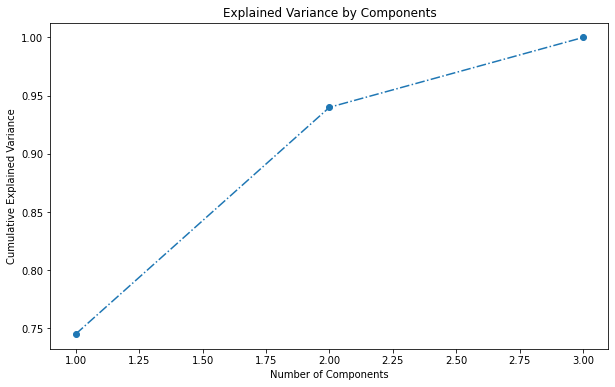

In [ ]:
# Plotting the explained variance by components to get number of components.
plt.figure(figsize = (10,6))
plt.plot(range(1,4),pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = "dashdot")
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(segm_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Obtaining PCA scores.
scoresPCA = pca.transform(segm_std)

In [ ]:
# Using PCA scores in K Means algorithm.
SS = []
for i in range(1,7):
  model = KMeans(n_clusters=i,init='k-means++',random_state=30)
  model.fit(scoresPCA)
  SS.append(model.inertia_)

In [ ]:
# Obtaining Silhoutte_Score to know number of clusters.
from sklearn.metrics import silhouette_score
for n_clusters in range(2,7):
    km = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    km.fit(dfLog)
    clusters = km.predict(dfLog)
    silhouette_avg = silhouette_score(dfLog, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.41886789121857426
For n_clusters = 3 The average silhouette_score is : 0.32840837779629883
For n_clusters = 4 The average silhouette_score is : 0.3476987972848088
For n_clusters = 5 The average silhouette_score is : 0.3084591875528929
For n_clusters = 6 The average silhouette_score is : 0.32053510718277434


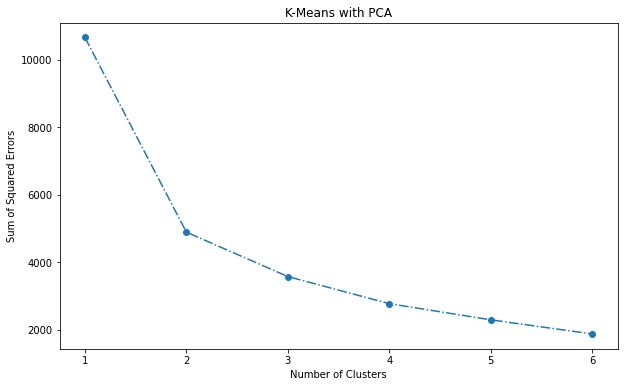

In [ ]:
# Using Elbow method to find number of clusters.
plt.figure(figsize = (10,6))
plt.plot(range(1,7), SS, marker ='o', linestyle ='dashdot')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Errors")
plt.title("K-Means with PCA")
plt.show()

In [ ]:
model = KMeans(n_clusters=2, init='k-means++', random_state=30)

In [ ]:
# Fitting Kmeans model on the basis of PCA scores.
model.fit(scoresPCA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=30, tol=0.0001, verbose=0)

In [ ]:
dfPCA = pd.concat([dfLog.reset_index(drop=True),pd.DataFrame(scoresPCA)],axis=1)
dfPCA.columns.values[-2:] = ["Component-1","Component-2"]
dfPCA["ClassPCA"] = model.labels_

In [ ]:
dfPCA.head()

,Monetary,Recency,Frequency,Component-1,Component-2,ClassPCA
0,11.253943,5.783979,0.001000,0.950354,-2.759245,0
1,8.157597,0.717840,2.197336,2.812269,0.799571,0
2,8.304230,1.115142,1.609638,2.321927,0.679341,0
3,6.848419,1.115142,1.386544,1.447466,1.287219,0
4,4.530123,5.366210,0.001000,-2.202208,-0.004817,1


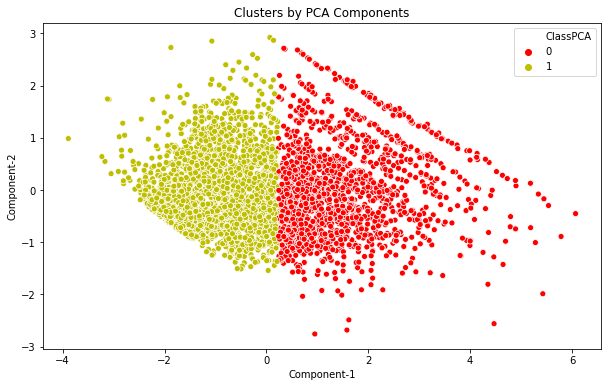

In [ ]:
# Plotting 2 clusters formed by PCA.
plt.figure(figsize = (10,6))
sns.scatterplot(dfPCA["Component-1"], dfPCA["Component-2"], hue = dfPCA["ClassPCA"], palette=['r','y'])
plt.title("Clusters by PCA Components")
plt.show()


In [ ]:
dfPCA

,Monetary,Recency,Frequency,Component-1,Component-2,ClassPCA
0,11.253943,5.783979,0.001000,0.950354,-2.759245,0
1,8.157597,0.717840,2.197336,2.812269,0.799571,0
2,8.304230,1.115142,1.609638,2.321927,0.679341,0
3,6.848419,1.115142,1.386544,1.447466,1.287219,0
4,4.530123,5.366210,0.001000,-2.202208,-0.004817,1
...,...,...,...,...,...,...
3775,5.196561,5.624198,0.001000,-1.967199,-0.408517,1
3776,4.392843,5.193235,0.001000,-2.207760,0.150652,1
3777,5.182345,1.953028,0.693647,-0.165876,1.606903,1
3778,7.644431,1.115142,2.772651,2.829567,0.580388,0


In [ ]:
# Generating new dataframe to divide revenue generated by each class.
dfPCA_ = pd.DataFrame(dfPCA)
dfPCA_.head()


,Monetary,Recency,Frequency,Component-1,Component-2,ClassPCA
0,11.253943,5.783979,0.001000,0.950354,-2.759245,0
1,8.157597,0.717840,2.197336,2.812269,0.799571,0
2,8.304230,1.115142,1.609638,2.321927,0.679341,0
3,6.848419,1.115142,1.386544,1.447466,1.287219,0
4,4.530123,5.366210,0.001000,-2.202208,-0.004817,1


In [ ]:
# Converting logarithmic values of monetary to numeric values.
dfPCA_['Monetary'] = np.exp(dfPCA_["Monetary"])


In [ ]:
# Obtaining sum of revenue and percentage of revenue for each class. 
dfPCA_ = dfPCA_.groupby('ClassPCA',as_index=False).agg({'Monetary': 'sum'})
dfPCA_['Percentage'] = round(dfPCA_['Monetary']/sum(dfPCA_['Monetary'])*100,2)

In [ ]:
dfPCA_

,ClassPCA,Monetary,Percentage
0,0,5159622.721,84.41
1,1,952999.972,15.59


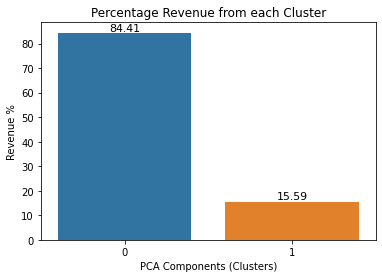

In [ ]:
# Plotting revenue for each PCA component using barplot.
axis = sns.barplot(x="ClassPCA", y="Percentage", data=dfPCA_)
for i in axis.patches:
             axis.annotate("%.2f" % i.get_height(), (i.get_x() + i.get_width() / 2., i.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.xlabel('PCA Components (Clusters)')
plt.ylabel('Revenue %')
plt.title('Percentage Revenue from each Cluster')
plt.show()

# **CLASSIFICATION**
## **LOGISTIC REGRESSION**

In [ ]:
# Importing libraries for Classification.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
# Assigning "Recency", "Frequency", "Monetary" in X , while "Loyalty Class" in y.
X = dfSeg[["Recency", "Frequency", "Monetary"]]
y = dfSeg["LoyaltyClass"]

In [ ]:
# Splitting into train and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

In [ ]:
# Model 1 :- Logistic Regression 
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_1 = model_1.predict(X_test)

In [ ]:
# Confusion Matrix for Logistic Regression
from sklearn.metrics import confusion_matrix, classification_report
confusionMatrix = confusion_matrix(y_test, y_pred_1)
print(confusionMatrix)

[[ 98   0   0  21]
 [  1 281  67  54]
 [  0  27 214   0]
 [ 25  48   0 307]]


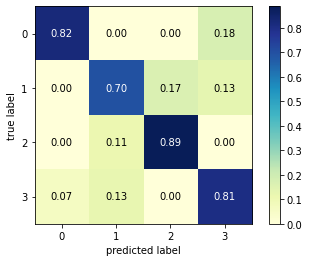

In [ ]:
# Plotting Confusion Matrix for logistics regression.
from mlxtend.plotting import plot_confusion_matrix
matrix = np.array(confusionMatrix)

classNames = [{'Platinum' : 0, 'Gold': 1, 'Silver': 2, 'Bronze': 3}]

fig, ax = plot_confusion_matrix(conf_mat = matrix,
                                colorbar = True,
                                show_absolute = False,
                                show_normed = True,
                                cmap="YlGnBu")

plt.show()

In [ ]:
# Accuracy and Balanced Accuracy for Logistics Regression.
print('Accuracy         : {}%'.format(round(metrics.accuracy_score(y_test, y_pred_1)*100,2)))

print('Balanced Accuracy: {}%'.format(round(balanced_accuracy_score(y_test, y_pred_1)*100,2)))

Accuracy         : 78.74%
Balanced Accuracy: 80.42%


In [ ]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

      Bronze       0.79      0.82      0.81       119
        Gold       0.79      0.70      0.74       403
    Platinum       0.76      0.89      0.82       241
      Silver       0.80      0.81      0.81       380

    accuracy                           0.79      1143
   macro avg       0.79      0.80      0.79      1143
weighted avg       0.79      0.79      0.79      1143



## **DECISION TREES**

In [ ]:
# Importing libraries for Decision Trees
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [ ]:
# Model 2 :- Decision Trees
from sklearn.metrics import accuracy_score, classification_report
model_2 = DecisionTreeClassifier(min_samples_split=100)
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)

In [ ]:
# Confusion Matrix for Decision Tree
from sklearn.metrics import confusion_matrix, classification_report
confusionMatrix = confusion_matrix(y_test, y_pred_2)
print(confusionMatrix)

[[119   0   0   0]
 [  0 367   4  32]
 [  0   0 241   0]
 [  3  17   0 360]]


'Retail.pdf'

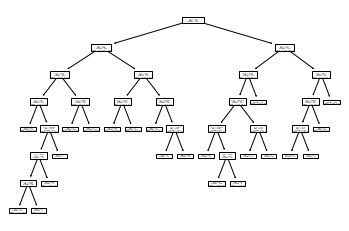

In [ ]:
# Plotting Decision Tree.
tree.plot_tree(model_2)
import graphviz
treeData = tree.export_graphviz(model_2, out_file=None)
network = graphviz.Source(treeData)
network.render("Retail")

In [ ]:
# Accuracy and Balanced Accuracy for Decision Tree.
print('Accuracy         : ',round(accuracy_score(y_test, y_pred_2)*100,2),'%')
print('Balanced Accuracy: ',round(balanced_accuracy_score(y_test, y_pred_2)*100,2),'%')

Accuracy         :  95.1 %
Balanced Accuracy:  96.45 %


In [ ]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

      Bronze       0.98      1.00      0.99       119
        Gold       0.96      0.91      0.93       403
    Platinum       0.98      1.00      0.99       241
      Silver       0.92      0.95      0.93       380

    accuracy                           0.95      1143
   macro avg       0.96      0.96      0.96      1143
weighted avg       0.95      0.95      0.95      1143



## **NAIVE BAYES**

In [ ]:
# Importing Libraries for Naive Bayes.
from sklearn.naive_bayes import MultinomialNB
# Model 3 :- Naive Bayes
model_3 = MultinomialNB()
model_3.fit(X_train,y_train)
y_pred_3 = model_3.predict(X_test)
# Accuracy and Balanced Accuracy for Naive Bayes.
print('Accuracy         : ',round(accuracy_score(y_pred_3,y_test)*100,2),'%')
print('Balanced Accuracy: ',round(balanced_accuracy_score(y_pred_3, y_test)*100,2),'%')

Accuracy         :  76.38 %
Balanced Accuracy:  74.95 %


In [ ]:
# Confusion Matrix for Decision Tree.
from sklearn.metrics import confusion_matrix, classification_report
confusionMatrix = confusion_matrix(y_test, y_pred_3)
print(confusionMatrix)

[[117   0   0   2]
 [  1 304  49  49]
 [  0  34 207   0]
 [ 83  52   0 245]]


In [ ]:
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

      Bronze       0.58      0.98      0.73       119
        Gold       0.78      0.75      0.77       403
    Platinum       0.81      0.86      0.83       241
      Silver       0.83      0.64      0.72       380

    accuracy                           0.76      1143
   macro avg       0.75      0.81      0.76      1143
weighted avg       0.78      0.76      0.76      1143



## **KNN**

In [ ]:
# Importing Libraries for KNN.
from sklearn.neighbors import KNeighborsClassifier
# Model 4 :- K Nearest Neighbour.
model_4 = KNeighborsClassifier(n_neighbors=3)
model_4.fit(X_train,y_train)
y_pred_4 = model_4.predict(X_test)
# Accuracy and Balanced Accuracy for KNN.
print('Accuracy         : ',round(accuracy_score(y_pred_4,y_test)*100,2),'%')
print('Balanced Accuracy: ',round(balanced_accuracy_score(y_pred_4,y_test)*100,2),'%')

Accuracy         :  82.76 %
Balanced Accuracy:  83.21 %


In [ ]:
# Confusion Matrix for KNN.
from sklearn.metrics import confusion_matrix, classification_report
confusionMatrix = confusion_matrix(y_test, y_pred_4)
print(confusionMatrix)

[[109   0   0  10]
 [  0 309  38  56]
 [  0  33 208   0]
 [ 20  40   0 320]]


In [ ]:
print(classification_report(y_test, y_pred_4))

              precision    recall  f1-score   support

      Bronze       0.84      0.92      0.88       119
        Gold       0.81      0.77      0.79       403
    Platinum       0.85      0.86      0.85       241
      Silver       0.83      0.84      0.84       380

    accuracy                           0.83      1143
   macro avg       0.83      0.85      0.84      1143
weighted avg       0.83      0.83      0.83      1143



## **RANDOM FOREST**

In [ ]:
# Importing Libraries for Random Forest.
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# Model 5 :- Random Forest
model_5 = RandomForestClassifier(max_depth = 3, random_state=0)
model_5.fit(X_train, y_train)
y_pred_5 = model_5.predict(X_test)
# Accuracy and Balanced Accuracy for Random Forest.
print('Accuracy         : ',round(accuracy_score(y_pred_5, y_test)*100,2),'%')
print('Balanced Accuracy: ',round(balanced_accuracy_score(y_pred_5, y_test)*100,2),'%')

Accuracy         :  93.79 %
Balanced Accuracy:  95.61 %


In [ ]:
# Confusion Matrix for Random Forest.
from sklearn.metrics import confusion_matrix, classification_report
confusionMatrix = confusion_matrix(y_test, y_pred_5)
print(confusionMatrix)

[[117   0   0   2]
 [  0 383   1  19]
 [  0  11 230   0]
 [  0  38   0 342]]


In [ ]:
print(classification_report(y_test, y_pred_5))

              precision    recall  f1-score   support

      Bronze       1.00      0.98      0.99       119
        Gold       0.89      0.95      0.92       403
    Platinum       1.00      0.95      0.97       241
      Silver       0.94      0.90      0.92       380

    accuracy                           0.94      1143
   macro avg       0.96      0.95      0.95      1143
weighted avg       0.94      0.94      0.94      1143



In [ ]:
# Model Comparison on the basis of Accuracy and Balanced Accuracy of each model.
models = {'Classification Model': ['Logistic Regression','Decision Trees','Naive Bayes','K-Nearest Neighbor', 'Random Forest'],
        'Accuracy': [round(accuracy_score(y_pred_1,y_test)*100,2),
                     round(accuracy_score(y_pred_2,y_test)*100,2),
                     round(accuracy_score(y_pred_3,y_test)*100,2),
                     round(accuracy_score(y_pred_4,y_test)*100,2),
                     round(accuracy_score(y_pred_5,y_test)*100,2)],
        'Balanced Accuracy': [round(balanced_accuracy_score(y_pred_1,y_test)*100,2),
                     round(balanced_accuracy_score(y_pred_2,y_test)*100,2),
                     round(balanced_accuracy_score(y_pred_3,y_test)*100,2),
                     round(balanced_accuracy_score(y_pred_4,y_test)*100,2),
                     round(balanced_accuracy_score(y_pred_5,y_test)*100,2)]
        }
models_df = pd.DataFrame(models, columns = ['Classification Model', 'Accuracy', 'Balanced Accuracy'])

models_df

,Classification Model,Accuracy,Balanced Accuracy
0,Logistic Regression,78.74,78.62
1,Decision Trees,95.10,95.83
2,Naive Bayes,76.38,74.95
3,K-Nearest Neighbor,82.76,83.21
4,Random Forest,93.79,95.61


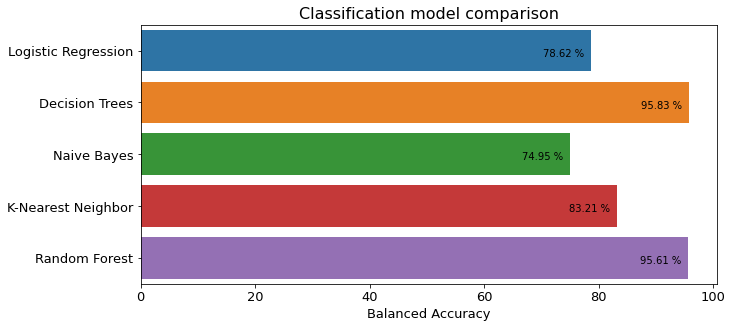

In [ ]:
# Model Comparison Plot based on Balanced Accuracy
plt.figure(figsize=(10,6))
axis = sns.barplot(x=models_df['Balanced Accuracy'], y=models_df['Classification Model'], data=models_df, orient='h', saturation=0.8)
axis.axes.set_title("Classification model comparison", fontsize=16)
axis.set_yticklabels(models_df['Classification Model'], fontsize=13)
axis.set_xticklabels([0, 20, 40, 60, 80, 100], fontsize=13) 
plt.xlabel("Balanced Accuracy", fontsize = 13)
plt.ylabel("", fontsize = 10)
plt.subplots_adjust(left=1, right=1.8, top=2.4, bottom=1.8)

for i, p in enumerate(axis.patches):
    axis.annotate("%.2f %%" % (p.get_width()),
                (p.get_x() + p.get_width(), p.get_y() + 0.7),
                xytext=(-48, 10), textcoords='offset points')

plt.show()


# **Conclusion**
Retail analytics is mainly focused on customer retention, product performance and revenue optimization. Based on our analysis using the transactional data, we conclude the following: \

*   Top 5 items based on Support value were obtained by performing association rule mining using Apriori algorithm. As an instance, item with description ‘White Hanging Heart T-Light Holder’ was observed having maximum support of 0.110385, which implied that this product has highest importance in the Online Retail transactions.
*   Product relationships were determined and identified based on Confidence, Lift, and Leverage metrics. As observed for the maximum confidence, customers purchased (Herb Marker Rosemary) whenever they purchase (Herb Marker Thyme). This association was observed with 95.24% confidence and 84.67% expectation that these item set will be purchased. Similar product relationships were determined for all the products in the transactions which gave an idea of high and low performing products.
*   Customers were segmented into 4 groups using Recency-Frequency-Monetary analysis. Based on these groups, we proposed a Loyalty program model having 4 loyalty classes i.e., Platinum, Gold, Silver and Bronze, to provide customers with pricing and promotions based on how recently the purchase has been carried out by the customer (Recency), how frequently a customer purchases (Frequency), and amount spent by the customer (Monetary)
*   Clusters were formed using Principal Component Analysis and K-means clustering to understand two major clusters which commensurate with 80-20 Pareto Principle by explained variance ratio. This also suggested the fact that there are mainly two types of customers i.e., loyal customers who contribute towards 80% of the revenue, and the others, who have infrequent purchase behaviour.
*   To propose suitable loyalty class to the new customers, multiple classification models were performed using train and test data, having accuracies in the following order: \
Decision Tree ≈ Random Forest > K-nearest Neighbour > Logistic Regression > Naïve Bayes
*   Based on the above supervised and unsupervised machine learning algorithms, we performed a complete retail analytics solution for different aspects of transactional data i.e., customers, products, and transactions, which can be used for revenue optimization, improving product performance and increasing customer retention rate.